In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)

In [3]:
#import Data path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(filenames)

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv
['sample.csv', 'train.csv', 'test.csv']


In [4]:
path_data = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/'

In [5]:
dftrain = pd.read_csv(path_data + 'train.csv')
dftrain.head(2)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...


In [6]:
dftrain.shape

(13636, 15)

In [7]:
numerics = ['int16', 'int32', 'int64']
print(dftrain.select_dtypes(include=numerics))

        ID  RecipeNumber  RecipeCode  UserReputation  CreationTimestamp  \
0       70            71       12259              20         1622717078   
1       72            88        8202               1         1622717852   
2      458             3        2832               1         1622717357   
3        7            50      100276               1         1622648899   
4       60            12       19731               1         1622718260   
...    ...           ...         ...             ...                ...   
13631  115            98       11767               1         1622716969   
13632  372             6       21444               1         1622717329   
13633   87            37       20170               1         1622718089   
13634   48            63       24886               1         1622717192   
13635  379             3        2832               1         1622717703   

       ReplyCount  ThumbsUpCount  ThumbsDownCount  Rating  BestScore  
0               0           

In [8]:
print(dftrain['RecipeNumber'].unique().shape)
print(dftrain['RecipeCode'].unique().shape)
print(dftrain['RecipeName'].unique().shape)

(100,)
(100,)
(100,)


In [9]:
from datetime import datetime
dftrain['datefield'] = pd.to_datetime(dftrain['CreationTimestamp'], unit='s')
dftrain['month'] = dftrain['datefield'].dt.month
dftrain['month'].value_counts()

month
6     12891
2       132
9        99
10       81
8        75
7        71
1        68
5        63
4        51
11       42
12       41
3        22
Name: count, dtype: int64

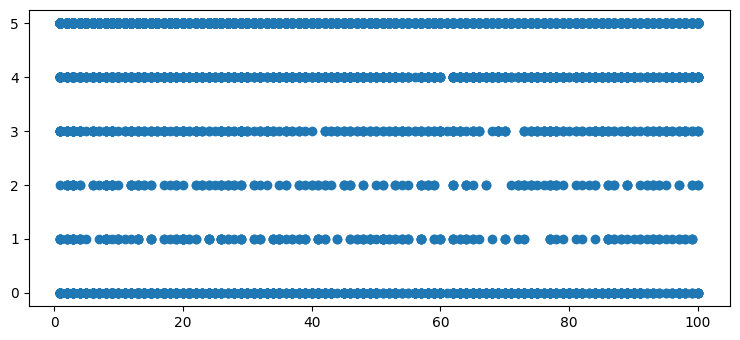

In [10]:
x = dftrain['RecipeNumber'].tolist()
y = dftrain['Rating'].tolist()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x, y)

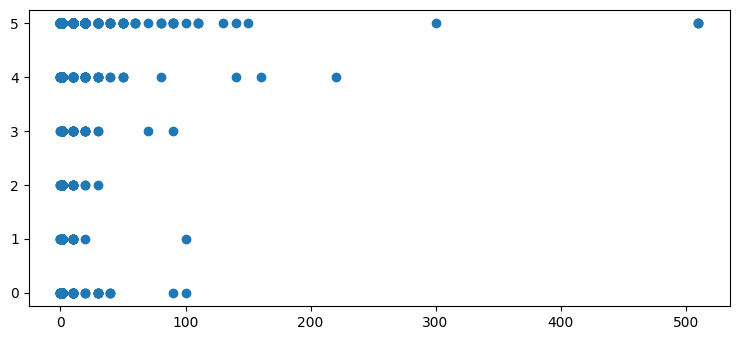

In [11]:
x = dftrain['UserReputation'].tolist()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x, y)

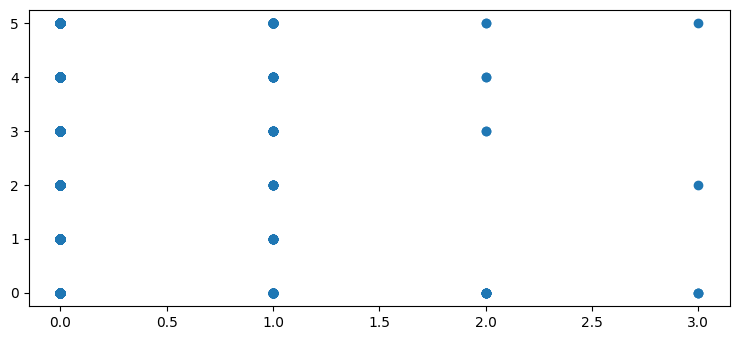

In [12]:
x = dftrain['ReplyCount'].tolist()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x, y)

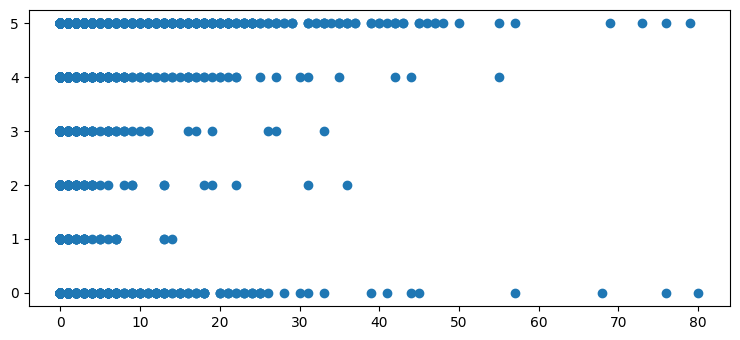

In [13]:
x = dftrain['ThumbsUpCount'].tolist()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x, y)

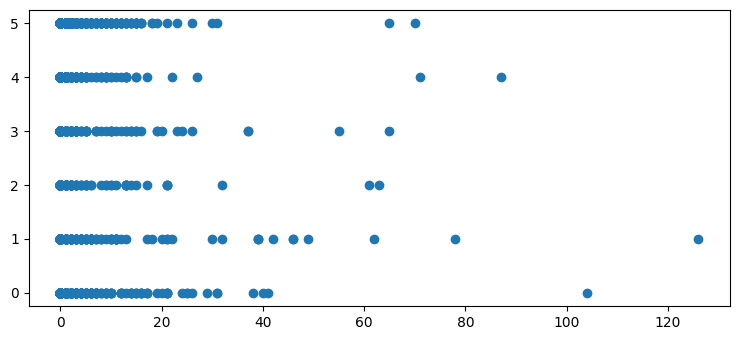

In [14]:
x = dftrain['ThumbsDownCount'].tolist()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x, y)

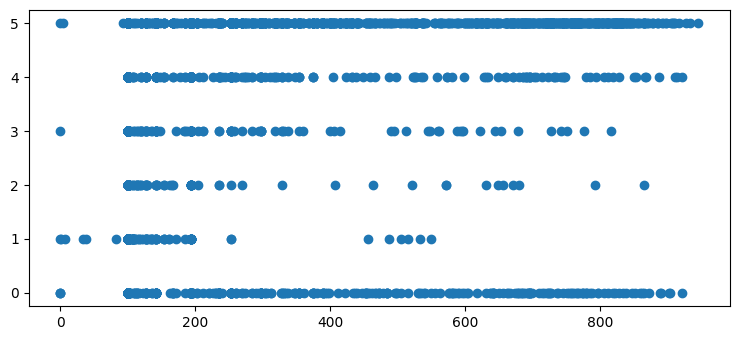

In [15]:
x = dftrain['BestScore'].tolist()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x, y)

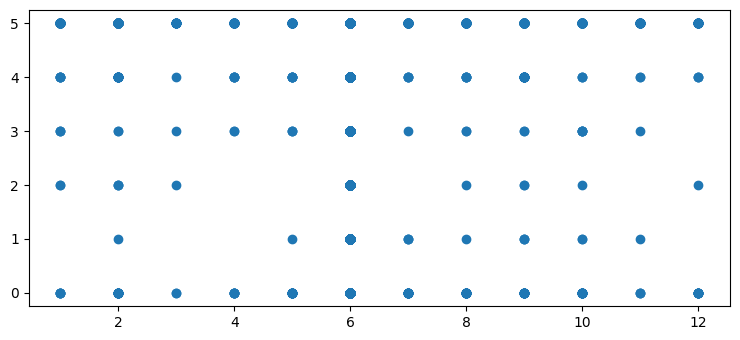

In [16]:
#Checking variation with month
x = dftrain['month'].tolist()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x, y)

In [17]:
pd.crosstab(dftrain.month,dftrain.Rating, normalize='columns')

Rating,0,1,2,3,4,5
month,,,,,,
1,0.003931,0.000000,0.011494,0.008152,0.004029,0.005110
2,0.012579,0.004762,0.017241,0.005435,0.012893,0.009064
3,0.001572,0.000000,0.005747,0.002717,0.000806,0.001639
4,0.004717,0.000000,0.000000,0.005435,0.004029,0.003664
5,0.012579,0.004762,0.000000,0.008152,0.004835,0.003568
6,0.905660,0.942857,0.936782,0.940217,0.946011,0.950535
7,0.011792,0.014286,0.000000,0.002717,0.003223,0.004628
8,0.014937,0.004762,0.005747,0.005435,0.004029,0.004532
9,0.010220,0.014286,0.011494,0.005435,0.013699,0.005978


In [18]:
dftrain.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
datefield            0
month                0
dtype: int64

In [19]:
dftest = pd.read_csv(path_data + 'test.csv')
dftest.head(2)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."


In [20]:
dftest['datefield'] = pd.to_datetime(dftest['CreationTimestamp'], unit='s')
dftest['month'] = dftest['datefield'].dt.month
dftest['month'].value_counts()

month
6     4310
2       47
9       26
10      24
4       23
7       23
8       23
5       22
1       19
11      11
3       10
12       8
Name: count, dtype: int64

In [21]:
dftest.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
datefield            0
month                0
dtype: int64

In [22]:
dftrain['RecipeName'].value_counts()

RecipeName
Cheeseburger Soup             553
Creamy White Chili            483
Best Ever Banana Bread        372
Enchilada Casser-Ole!         313
Basic Homemade Bread          307
                             ... 
Cheeseburger Paradise Soup     68
Lime Chicken Tacos             65
Caramel Heavenlies             64
Blueberry French Toast         64
Vegetarian Linguine            19
Name: count, Length: 100, dtype: int64

In [23]:
dftrain['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

In [24]:
dftrain['BestScore'].value_counts()

BestScore
100    10506
193     1074
253      292
142      147
297      124
       ...  
908        1
529        1
119        1
226        1
754        1
Name: count, Length: 525, dtype: int64

In [25]:
#Adding Month to add if any seasonality
dfT_analysis = dftrain.filter(['UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore','Rating','Recipe_Review','RecipeName','RecipeNumber','month'], axis=1)
#dfT_analysis = dftrain.filter(['ReplyCount','ThumbsUpCount','ThumbsDownCount','Rating'], axis=1)
dfTVal_analysis = dftest.filter(['UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore','Recipe_Review','RecipeName','RecipeNumber','month'], axis=1)
dfT_analysis.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Rating,Recipe_Review,RecipeName,RecipeNumber,month
0,20,0,0,0,100,5,great recipe! I have made them just as written...,Banana Bars with Cream Cheese Frosting,71,6
1,1,0,0,1,100,5,This is an easy and quick recipe that is great...,Simple Taco Soup,88,6
2,1,0,0,0,100,3,I think I was looking for something extra spec...,Cheeseburger Soup,3,6
3,1,0,0,0,100,5,This is our favorite grilled chicken recipe. ...,Grilled Huli Huli Chicken,50,6
4,1,0,0,0,100,4,Great basic recipe. I added 2 teaspoons Tuscan...,Cauliflower Soup,12,6


In [26]:
#Vectorize Review and text columns to Numeric
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
rem_words = ["I",",",".","and","to","To","my","My","husband","wife","the","So","so","-","is","39","for","of","or","you","will","and","they","this","time"]
#vectorizer = TfidfVectorizer(max_df=0.70, min_df=0.007, stop_words=rem_words)  #This combintion has good score by taking too long, so trying the below to reduce number of features
vectorizer = TfidfVectorizer(max_df=0.90, min_df=0.01, stop_words=rem_words)

vectorizerNG = TfidfVectorizer(max_df=0.99, min_df=0.001,ngram_range=(6,7)) #Earlier ngram was 5,7. Temporarily changed it to 6,7
vect_recp = TfidfVectorizer(max_df=0.90, min_df=10, stop_words=rem_words)

vectorized_review = vectorizer.fit_transform(dftrain['Recipe_Review'].values.astype('U'))
vectorized_reviewNG = vectorizerNG.fit_transform(dftrain['Recipe_Review'].values.astype('U'))
vectorized_recp = vect_recp.fit_transform(dftrain['RecipeName'].values.astype('U'))
print (vectorized_review.toarray().shape, vectorized_reviewNG.toarray().shape, vectorized_recp.toarray().shape)

(13636, 432) (13636, 27) (13636, 183)


In [27]:
#print (vectorizer.get_feature_names_out(), vectorized_review.shape)

In [28]:
#Tried count vectorizer on review column if it works differently from TFIDF
cnt_vectorizer = CountVectorizer(analyzer='word',max_df=0.99, min_df=0.001, ngram_range=(5,6)) #stop_words=rem_words
vect_cnt_rev = cnt_vectorizer.fit_transform(dftrain['Recipe_Review'].values.astype('U'))

In [29]:
#print (cnt_vectorizer.get_feature_names_out(), vect_cnt_rev.shape)

In [30]:
dftrain.shape

(13636, 17)

Axes(0.125,0.11;0.775x0.77)


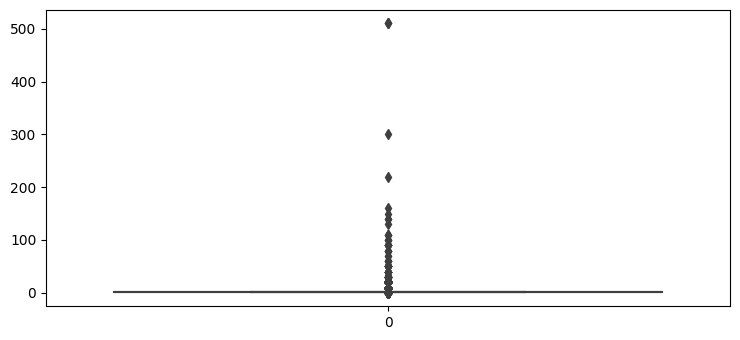

In [31]:
import seaborn as sns
print(sns.boxplot(dfT_analysis['UserReputation']))

Checking Outliers and if any neccessities to manage outliers. However, did not implement any outlier treatment as outlier treatment was reducing accuracy. Hence, to keep the variance, continued without any outlier treatment

1.0 1.0 20.0
Axes(0.125,0.11;0.775x0.77)


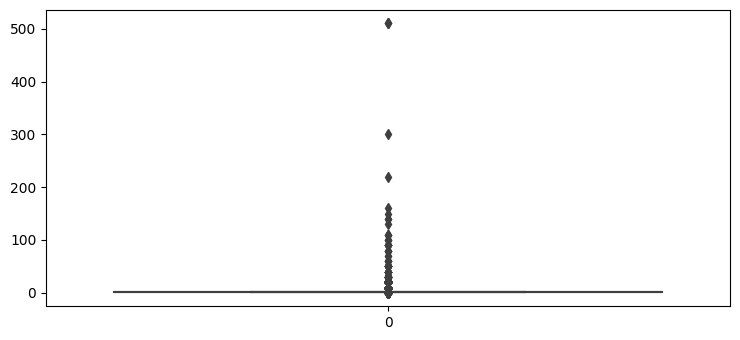

In [32]:
Q3 = np.quantile(dfT_analysis['UserReputation'], 0.75)
Q1 = np.quantile(dfT_analysis['UserReputation'], 0.25)
q99 = np.quantile(dfT_analysis['UserReputation'], 0.99)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
print(Q3, Q1, q99)
tmplist = np.array(dfT_analysis['UserReputation'].values.tolist())
#dfT_analysis['UserReputation'] = np.where(tmplist > 20, 20, tmplist).tolist()
print(sns.boxplot(dfT_analysis['UserReputation']))

In [33]:
pd.crosstab(dfT_analysis.UserReputation, dfT_analysis.Rating, normalize='columns')

Rating,0,1,2,3,4,5
UserReputation,,,,,,
0,0.011006,0.019048,0.017241,0.005435,0.008058,0.008196
1,0.955189,0.928571,0.913793,0.926630,0.921837,0.930865
10,0.022013,0.042857,0.051724,0.038043,0.037873,0.035773
20,0.002358,0.004762,0.011494,0.019022,0.020145,0.017260
30,0.005503,0.000000,0.005747,0.005435,0.004835,0.003664
40,0.002358,0.000000,0.000000,0.000000,0.001612,0.000675
50,0.000000,0.000000,0.000000,0.000000,0.002417,0.001253
60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000386
70,0.000000,0.000000,0.000000,0.002717,0.000000,0.000096


In [34]:
x_revchk = vectorized_review.toarray()
ychk = np.array(dftrain['Rating'].tolist())
print(x_revchk.shape, ychk.shape)

(13636, 432) (13636,)


In [35]:
#x_revchk = x_revchk.reshape(1230,13636)

In [36]:
#print(x_revchk[0].shape, ychk.shape)

In [37]:
#Finding correlation between Review matrix and Target variable
#acorr = np.corrcoef(x_revchk, ychk)
#np.percentile(acorr, 99)

In [38]:
tmplist = np.array(dfTVal_analysis['UserReputation'].values.tolist())
#dfTVal_analysis['UserReputation'] = np.where(tmplist > 20, 20, tmplist).tolist() #Convert outliers above 20 to 20

In [39]:
dfT_analysis.head(2)

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Rating,Recipe_Review,RecipeName,RecipeNumber,month
0,20,0,0,0,100,5,great recipe! I have made them just as written...,Banana Bars with Cream Cheese Frosting,71,6
1,1,0,0,1,100,5,This is an easy and quick recipe that is great...,Simple Taco Soup,88,6


Axes(0.125,0.11;0.775x0.77)
0.0 0.0 47.0


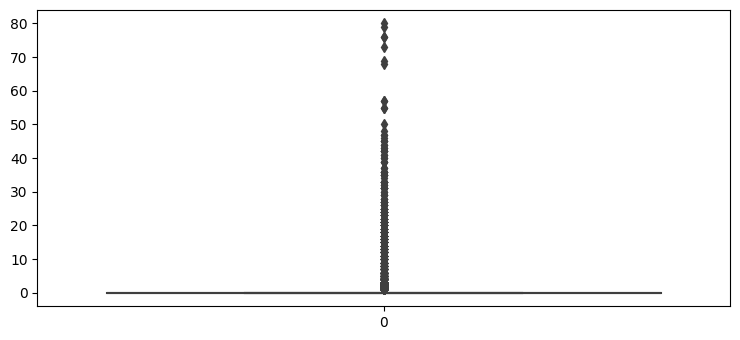

In [40]:
print(sns.boxplot(dfT_analysis['ThumbsUpCount']))
Q3 = np.quantile(dfT_analysis['ThumbsUpCount'], 0.75)
Q1 = np.quantile(dfT_analysis['ThumbsUpCount'], 0.25)
q99 = np.quantile(dfT_analysis['ThumbsUpCount'], 0.999)
print (Q1, Q3, q99)

In [41]:
pd.crosstab(dfT_analysis.ThumbsUpCount, dfT_analysis.Rating, normalize='columns')

Rating,0,1,2,3,4,5
ThumbsUpCount,,,,,,
0,0.746069,0.676190,0.672414,0.698370,0.780822,0.785652
1,0.080975,0.195238,0.132184,0.130435,0.100725,0.091602
2,0.034591,0.028571,0.057471,0.065217,0.036261,0.033652
3,0.022013,0.042857,0.034483,0.027174,0.012087,0.020345
4,0.011006,0.004762,0.034483,0.016304,0.011281,0.010992
5,0.012579,0.014286,0.005747,0.002717,0.008864,0.007521
6,0.011792,0.004762,0.005747,0.016304,0.011281,0.007714
7,0.013365,0.019048,0.000000,0.008152,0.004029,0.004628
8,0.003145,0.000000,0.005747,0.008152,0.005641,0.004146


In [42]:
tmplist = np.array(dfT_analysis['ThumbsUpCount'].values.tolist())
#dfT_analysis['ThumbsUpCount'] = np.where(tmplist > 47, 47, tmplist).tolist()
tmplist = np.array(dfTVal_analysis['ThumbsUpCount'].values.tolist())
#dfTVal_analysis['ThumbsUpCount'] = np.where(tmplist > 47, 47, tmplist).tolist() #Convert outliers above 47 to 47

Axes(0.125,0.11;0.775x0.77)
0.0 0.0 46.0


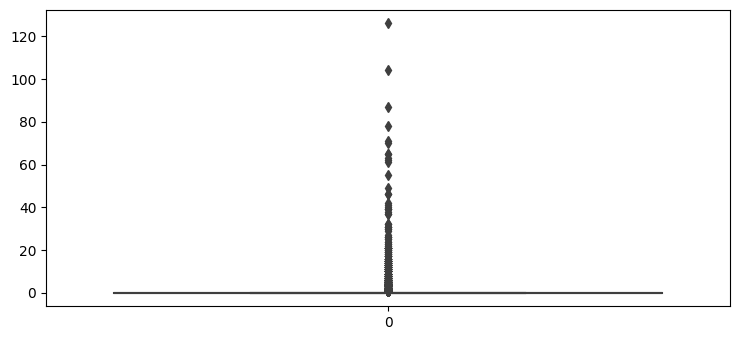

In [43]:
print(sns.boxplot(dfT_analysis['ThumbsDownCount']))
Q3 = np.quantile(dfT_analysis['ThumbsDownCount'], 0.75)
Q1 = np.quantile(dfT_analysis['ThumbsDownCount'], 0.25)
q99 = np.quantile(dfT_analysis['ThumbsDownCount'], 0.999)
print (Q1, Q3, q99)

In [44]:
pd.crosstab(dfT_analysis.ThumbsDownCount, dfT_analysis.Rating, normalize='columns')

Rating,0,1,2,3,4,5
ThumbsDownCount,,,,,,
0,0.821541,0.471429,0.545977,0.673913,0.841257,0.895285
1,0.062893,0.123810,0.172414,0.135870,0.084609,0.059879
2,0.034591,0.061905,0.074713,0.051630,0.028203,0.016199
3,0.011792,0.028571,0.034483,0.032609,0.012893,0.008485
4,0.011006,0.047619,0.017241,0.008152,0.006446,0.003857
5,0.006289,0.028571,0.028736,0.016304,0.005641,0.004628
6,0.007862,0.057143,0.011494,0.000000,0.000806,0.002603
7,0.006289,0.014286,0.000000,0.008152,0.001612,0.001928
8,0.002358,0.014286,0.005747,0.002717,0.002417,0.001157


In [45]:
tmplist = np.array(dfT_analysis['ThumbsDownCount'].values.tolist())
#dfT_analysis['ThumbsDownCount'] = np.where(tmplist > 46, 46, tmplist).tolist()
tmplist = np.array(dfTVal_analysis['ThumbsDownCount'].values.tolist())
#dfTVal_analysis['ThumbsDownCount'] = np.where(tmplist > 46, 46, tmplist).tolist() #Convert outliers above 46 to 46

Axes(0.125,0.11;0.775x0.77)
100.0 100.0 805.0


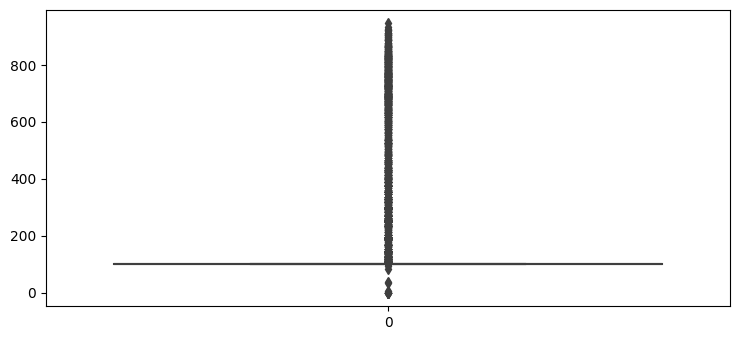

In [46]:
print(sns.boxplot(dfT_analysis['BestScore']))
Q3 = np.quantile(dfT_analysis['BestScore'], 0.75)
Q1 = np.quantile(dfT_analysis['BestScore'], 0.25)
q99 = np.quantile(dfT_analysis['BestScore'], 0.99)
print (Q1, Q3, q99)

In [47]:
pd.crosstab(dfT_analysis.BestScore, dfT_analysis.Rating, normalize='columns')

Rating,0,1,2,3,4,5
BestScore,,,,,,
0,0.002358,0.004762,0.0,0.002717,0.000000,0.000096
1,0.000000,0.004762,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000096
7,0.000000,0.004762,0.0,0.000000,0.000000,0.000000
34,0.000000,0.004762,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
918,0.000000,0.000000,0.0,0.000000,0.000000,0.000096
922,0.000786,0.000000,0.0,0.000000,0.000806,0.000000
928,0.000000,0.000000,0.0,0.000000,0.000000,0.000096


In [48]:
tmplist = np.array(dfT_analysis['BestScore'].values.tolist())
#dfT_analysis['BestScore'] = np.where(tmplist > 805, 805, tmplist).tolist()
tmplist = np.array(dfTVal_analysis['BestScore'].values.tolist())
#dfTVal_analysis['BestScore'] = np.where(tmplist > 805, 805, tmplist).tolist() #Convert outliers above 805 to 805

In [49]:
feature_columns = ['UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','BestScore','Recipe_Review','RecipeName','RecipeNumber','month']
numeric_columns = ['UserReputation','ReplyCount','ThumbsUpCount','ThumbsDownCount','RecipeNumber']
Review_columns = ['Recipe_Review']
month_col = ['month']
recp_col = ['RecipeName']
recp_num = ['RecipeNumber']
#feature_columns = ['ReplyCount','ThumbsUpCount','ThumbsDownCount']
X = dfT_analysis[feature_columns]
y = dfT_analysis.Rating
X_val = dfTVal_analysis[numeric_columns]

In [50]:
random_seed = 10
dfTsamp = dfT_analysis.sample(frac=1) #Creating a random shuffle of the data sample

In [51]:
dfT_analysis.shape[0]

13636

In [52]:
#select ratio to split into Train and Test set for model tuning
ratio=0.7
numrows = dfT_analysis.shape[0]
train_size=int(numrows*ratio)
trainsamp=dfTsamp[0:train_size]
testsamp=dfTsamp[train_size:]

In [53]:
trainsamp.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Rating,Recipe_Review,RecipeName,RecipeNumber,month
2190,1,0,0,0,100,4,I thought the flavor was good but it didn&#39;...,Enchilada Casser-Ole!,9,6
41,1,0,0,0,100,5,"Delicious! Easy to prepare, flavorful, and lov...",Shrimp Scampi,39,6
2187,10,0,0,0,100,5,It&#39;s perfect. There&#39;s no a thing I&#39...,Favorite Chicken Potpie,6,6
1167,10,0,0,0,100,5,I loved this! Incredibly easy and the flavors ...,Egg Roll Noodle Bowl,99,6
7902,1,0,0,0,100,5,A simple recipe and very good taste. No proble...,Porcupine Meatballs,89,6


Adding random set of training data to increase target label other than 5 for sufficient training example of all classes

In [54]:
dummydf=trainsamp[trainsamp['Rating']<5]
dummydf = dummydf.sample(frac=1)
tmpl = dummydf.shape[0]*0.3
tmpl = int(tmpl)
dmdf = dummydf[0:tmpl]
dmdf.head()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Rating,Recipe_Review,RecipeName,RecipeNumber,month
1102,1,0,0,0,100,4,Finally a homemade mac n&#39; cheese that&#39;...,Creamy Macaroni and Cheese,78,6
356,1,1,10,2,348,4,Wife and I enjoyed the dish. Good mix of swee...,Smothered Chicken Breasts,58,6
8439,1,0,2,0,678,0,"Family loved this, wonderful taste. Great br...",Lemon Blueberry Bread,59,5
8635,10,0,1,2,127,1,I didn&#39;t like this at all. Way to much che...,Cheeseburger Soup,3,6
9651,1,0,5,0,354,4,"Very moist and light. Cake-like, not dense lik...",Gluten-Free Banana Bread,49,6


In [55]:
print("Before boosting training sample, sample size:", trainsamp.shape)
print(trainsamp['Rating'].value_counts())

Before boosting training sample, sample size: (9545, 10)
Rating
5    7297
0     887
4     842
3     254
1     149
2     116
Name: count, dtype: int64


In [56]:
trainsamp = pd.concat([trainsamp,dmdf])
trainsamp.head()
print("After boosting training sample, sample size:",trainsamp.shape)
print(trainsamp['Rating'].value_counts())

After boosting training sample, sample size: (10219, 10)
Rating
5    7297
0    1171
4    1096
3     321
1     189
2     145
Name: count, dtype: int64


In [57]:
# split X and y into training and testing sets, 
#This is another option but not used now, as used the above process instead 
#For training sample boost with other class labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
#Preparing full training sample
X_full = dfT_analysis[feature_columns]
y_full = dfT_analysis.Rating

In [59]:
X_train = trainsamp[feature_columns]
y_train = trainsamp.Rating
X_test = testsamp[feature_columns]
y_test = testsamp.Rating

In [60]:
print(y_train.value_counts())

Rating
5    7297
0    1171
4    1096
3     321
1     189
2     145
Name: count, dtype: int64


In [61]:
print(X_train.shape, X_test.shape)

(10219, 9) (4091, 9)


In [62]:
targetratio = y_train.value_counts()[5]/y_train.value_counts()
targrat = 1-targetratio #For setting Max Pos Weight in XGBoost

In [63]:
encoder = OneHotEncoder()
encoder_month = OneHotEncoder()
X_tr_recpnum = encoder.fit_transform(X_train['RecipeNumber'].array.reshape(-1, 1)).toarray()
X_tr_recpnum
X_tr_month = encoder_month.fit_transform(X_train['month'].array.reshape(-1, 1)).toarray()

In [64]:
X_test_recpnum = encoder.transform(X_test['RecipeNumber'].array.reshape(-1, 1)).toarray()
X_test_recpnum
X_test_month = encoder_month.transform(X_test['month'].array.reshape(-1, 1)).toarray()

In [65]:
X_val_recpnum = encoder.transform(dfTVal_analysis['RecipeNumber'].array.reshape(-1, 1)).toarray()
X_val_recpnum
X_val_month = encoder_month.transform(dfTVal_analysis['month'].array.reshape(-1, 1)).toarray()

In [66]:
#X_train.head()
#X_train_num = X_train[numeric_columns]
#X_train_rev = X_train[Review_columns]
#X_train_recp = X_train[recp_col]

In [67]:
#X_train_recp.head()

In [68]:
X_train_num = X_train[numeric_columns]
X_tr_list_num = X_train_num.to_numpy() #For checking numeric variable variance
X_train_list = X_train_num.to_numpy()

X_train_rev = X_train[Review_columns]
X_train_recp = X_train[recp_col]
X_train_month = X_train[month_col]

y_train_list = y_train.to_numpy()
y_train_list.shape

(10219,)

In [69]:
X_full_num = X_full[numeric_columns]
X_fl_list_num = X_full_num.to_numpy() #For checking numeric variable variance
X_full_list = X_full_num.to_numpy()

X_full_rev = X_full[Review_columns]
X_full_recp = X_full[recp_col]
X_full_month = X_full[month_col]

y_full_list = y_full.to_numpy()
print (X_full_list.shape, y_full_list.shape)

(13636, 5) (13636,)


In [70]:
X_fl_list_num.shape

(13636, 5)

In [71]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [72]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_tr_list_num, y_train_list)

SVC()

In [73]:
'''
forward_fs_best=sfs(estimator = svc, k_features = 'best', forward = True,verbose = 1, scoring = 'r2')
sfs_forward_best=forward_fs_best.fit(X_tr_list_num, y_train_list)
'''

"\nforward_fs_best=sfs(estimator = svc, k_features = 'best', forward = True,verbose = 1, scoring = 'r2')\nsfs_forward_best=forward_fs_best.fit(X_tr_list_num, y_train_list)\n"

In [74]:
#print('R-Squared value:', sfs_forward_best.k_score_)

In [75]:
'''
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
test_model = LogisticRegression(max_iter=100)
sts_F = SequentialFeatureSelector(test_model, n_features_to_select='auto', direction='forward')
sts_F.fit_transform(X_tr_list_num, y_train_list)
print(sts_F.get_support())
'''

"\nfrom sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.linear_model import LogisticRegression\ntest_model = LogisticRegression(max_iter=100)\nsts_F = SequentialFeatureSelector(test_model, n_features_to_select='auto', direction='forward')\nsts_F.fit_transform(X_tr_list_num, y_train_list)\nprint(sts_F.get_support())\n"

In [76]:
'''
sts_B = SequentialFeatureSelector(test_model, n_features_to_select='auto', direction='backward')
sts_B.fit_transform(X_tr_list_num, y_train_list)
print(sts_B.get_support())
'''

"\nsts_B = SequentialFeatureSelector(test_model, n_features_to_select='auto', direction='backward')\nsts_B.fit_transform(X_tr_list_num, y_train_list)\nprint(sts_B.get_support())\n"

In [77]:
vectorized_review_train = vectorizer.fit_transform(X_train_rev['Recipe_Review'].values.astype('U')) #This is using TFIDF Vectorizer
vectorized_review_trainNG = vectorizerNG.fit_transform(X_train_rev['Recipe_Review'].values.astype('U')) #This is using TFIDF Vectorizer
#vectorized_review_train = cnt_vectorizer.fit_transform(X_train_rev['Recipe_Review'].values.astype('U')) #This is using count vectorizer with n-gram

vectorized_recp_train = vect_recp.fit_transform(X_train_recp['RecipeName'].values.astype('U'))
#vectorized_month_train = vect_month.fit_transform(X_train_month['month'].values.astype('U'))

In [78]:
X_tr_rev = vectorized_review_train.toarray()
X_tr_revNG = vectorized_review_trainNG.toarray()

X_tr_recp = vectorized_recp_train.toarray()
#X_tr_month = vectorized_month_train.toarray()
print (X_tr_rev.shape, X_tr_revNG.shape, X_tr_recp.shape, X_tr_month.shape)

(10219, 427) (10219, 23) (10219, 183) (10219, 12)


In [79]:
print(X_tr_rev, X_tr_revNG)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.29091697]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [80]:
#Concatenate Numeric and review columns
X_train_list = np.concatenate((X_train_list,X_tr_rev),axis=1) #Review with single word token
X_train_list = np.concatenate((X_train_list,X_tr_revNG),axis=1) #Review data with nGram tokens
#X_train_list = np.concatenate((X_train_list,X_tr_recpnum),axis=1)
X_train_list = np.concatenate((X_train_list,X_tr_month),axis=1)
X_train_list.shape

(10219, 467)

In [81]:
'''
svc.fit(X_train_list, y_train_list)
forward_fs_best=sfs(estimator = svc, k_features = 'best', forward = True,verbose = 1, scoring = 'r2')
sfs_forward_best=forward_fs_best.fit(X_train_list, y_train_list)
'''

"\nsvc.fit(X_train_list, y_train_list)\nforward_fs_best=sfs(estimator = svc, k_features = 'best', forward = True,verbose = 1, scoring = 'r2')\nsfs_forward_best=forward_fs_best.fit(X_train_list, y_train_list)\n"

In [82]:
#print('R-Squared value:', sfs_forward_best.k_score_)

In [83]:
X_test_num = X_test[numeric_columns]
X_test_list = X_test_num.to_numpy()

X_test_rev = X_test[Review_columns]
X_test_recp = X_test[recp_col]


y_test_list = y_test.to_numpy()
X_test_list.shape

(4091, 5)

In [84]:
#This is using TFIDF Vectorizer
X_test_revT = vectorizer.transform(X_test_rev['Recipe_Review'].values.astype('U'))
X_test_revTNG = vectorizerNG.transform(X_test_rev['Recipe_Review'].values.astype('U'))
#This is using count vectorizer
#X_test_revT = cnt_vectorizer.transform(X_test_rev['Recipe_Review'].values.astype('U'))

X_test_revT = X_test_revT.toarray()
X_test_revTNG = X_test_revTNG.toarray()

X_test_recpT = vect_recp.transform(X_test_recp['RecipeName'].values.astype('U'))
X_test_recpT = X_test_recpT.toarray()

X_test_list = np.concatenate((X_test_list,X_test_revT),axis=1) #Review with single word token
X_test_list = np.concatenate((X_test_list,X_test_revTNG),axis=1) #Review data with nGram tokens
#X_test_list = np.concatenate((X_test_list,X_test_recpnum),axis=1)
X_test_list = np.concatenate((X_test_list,X_test_month),axis=1)
print(X_test_list.shape)

(4091, 467)


In [ ]:
#Vectorizer on full data set
vectorized_review_full = vectorizer.fit_transform(X_full_rev['Recipe_Review'].values.astype('U')) #This is using TFIDF Vectorizer
vectorized_review_fullNG = vectorizerNG.fit_transform(X_full_rev['Recipe_Review'].values.astype('U')) #This is using TFIDF Vectorizer
#vectorized_review_train = cnt_vectorizer.fit_transform(X_train_rev['Recipe_Review'].values.astype('U')) #This is using count vectorizer with n-gram

vectorized_recp_full = vect_recp.fit_transform(X_full_recp['RecipeName'].values.astype('U'))
#vectorized_month_train = vect_month.fit_transform(X_full_month['month'].values.astype('U'))

In [ ]:
X_fl_rev = vectorized_review_full.toarray()
X_fl_revNG = vectorized_review_fullNG.toarray()
X_fl_recp = vectorized_recp_full.toarray()
X_fl_month = encoder_month.fit_transform(X_full['month'].array.reshape(-1, 1)).toarray()
#X_fl_month = vectorized_month_full.toarray()
print (X_fl_rev.shape, X_fl_revNG.shape, X_fl_recp.shape, X_fl_month.shape)

In [ ]:
X_full_list.shape

In [ ]:
#Concatenate Numeric and review columns
X_full_list = np.concatenate((X_full_list,X_fl_rev),axis=1) #Review with single word token
X_full_list = np.concatenate((X_full_list,X_fl_revNG),axis=1) #Review data with nGram tokens
#X_train_list = np.concatenate((X_train_list,X_tr_recpnum),axis=1)
X_full_list = np.concatenate((X_full_list,X_fl_month),axis=1)
X_full_list.shape

In [ ]:
#Validation set
X_val_list = X_val.to_numpy()
print(X_val_list.shape)
X_val_rev = dftest[Review_columns]
X_val_recp = dftest[recp_col]

#This is using TFIDF
X_val_revT = vectorizer.transform(X_val_rev['Recipe_Review'].values.astype('U'))
X_val_revTNG = vectorizerNG.transform(X_val_rev['Recipe_Review'].values.astype('U'))
#This is using count vectorizer
#X_val_revT = cnt_vectorizer.transform(X_val_rev['Recipe_Review'].values.astype('U'))

X_val_revT = X_val_revT.toarray()
X_val_revTNG = X_val_revTNG.toarray()

X_val_recpT = vect_recp.transform(X_val_recp['RecipeName'].values.astype('U'))
X_val_recpT = X_val_recpT.toarray()
#X_val_monthT = vect_month.transform(X_val_recp['month'].values.astype('U'))
#X_val_monthT = X_val_monthT.toarray()

X_val_list = np.concatenate((X_val_list,X_val_revT),axis=1) #Review with single word token
X_val_list = np.concatenate((X_val_list,X_val_revTNG),axis=1) #Review data with nGrams
#X_val_list = np.concatenate((X_val_list,X_val_recpnum),axis=1)
X_val_list = np.concatenate((X_val_list,X_val_month),axis=1)

print(X_val_list.shape)

In [ ]:
from numpy import mean
from numpy import std
from sklearn import model_selection
from sklearn import linear_model

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#'''commenting normalization of data temporarily
#Normalize and standadize features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scale=StandardScaler()

'''Changing to Min Max Scalar to have all variables in same scale
X_train_list = scale.fit_transform(X_train_list)
X_test_list = scale.transform(X_test_list)
X_val_list = scale.transform(X_val_list)
'''
#'''
X_train_list = min_max_scaler.fit_transform(X_train_list)
X_test_list = min_max_scaler.transform(X_test_list)

X_full_list = min_max_scaler.fit_transform(X_full_list)
X_val_list = min_max_scaler.transform(X_val_list)

#'''

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Testing if any polynomial relation exists
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [ ]:
#X_train_list[:,1].reshape(-1,1).shape
print(X_train_list[:,1].shape, X_train_list.shape)

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

In [ ]:
#X_full_list = xf_list.copy()
#y_full_list = yf_list.copy()

'''
xT_list = X_train_list.copy()
yT_list = y_train_list.copy()
print (xT_list.shape, yT_list.shape)
'''

In [ ]:
#Handle impabalnce sample through Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

#Smote is unneccessarily increasing variance in the model
X_train_list, y_train_list = sm.fit_resample(xT_list, yT_list)

In [ ]:
print(X_train_list.shape, y_train_list.shape)

In [ ]:
#Smote is unneccessarily increasing variance in the model
#X_full_list, y_full_list = sm.fit_resample(xf_list, yf_list)

In [ ]:
print (X_full_list.shape,y_full_list.shape)

In [ ]:
np.unique(y_train_list, return_counts=True)

In [ ]:
X_poly = poly.fit_transform(X_train_list[:,1].reshape(-1,1))
poly.fit(X_poly, y_train_list)
print(X_poly.shape, y_train_list.shape)

In [ ]:
lin2 = LinearRegression()
lin2.fit(X_poly, y_train_list)

In [ ]:
plt.scatter(X_train_list[:,1].reshape(-1,1), y_train_list, color='blue')
 
plt.plot(X_train_list[:,1].reshape(-1,1), lin2.predict(poly.fit_transform(X_train_list[:,1].reshape(-1,1))),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('X Feature')
plt.ylabel('y Target')
 
plt.show()

In [ ]:
#Fitting PCA to reduce dimension
#pca = PCA(n_components=150)
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train_list)
X_test_pca = pca.transform(X_test_list)

#pcaF = PCA(n_components=150)
pcaF = PCA(n_components=None)

X_full_pca = pcaF.fit_transform(X_full_list)
X_val_pca = pcaF.transform(X_val_list)
print (X_train_pca.shape, X_test_pca.shape, X_full_pca.shape, X_val_pca.shape)

In [ ]:
parameterGrid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [100,1000,2500,5000,6000]
    }
]

In [ ]:
#Creating balanced class weight for Logistic Regression
from sklearn.utils import class_weight
# Calculate class weights  
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train_list), y = y_train_list)


In [ ]:
'''
mclasslm = linear_model.LogisticRegression(multi_class='ovr', solver='lbfgs', class_weight=dict(enumerate(class_weights)), random_state=0)
mclasslm.fit(X_train_list, y_train_list)
#mclasslm.fit(X_train_pca, y_train_list)
'''

In [ ]:
from sklearn.model_selection import GridSearchCV
LG_GS = GridSearchCV(mclasslm, param_grid = parameterGrid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
#best_hypP = LG_GS.fit(X_train_pca, y_train_list) #Geidsearch commented
#best_hypP = LG_GS.fit(X_train_list, y_train_list) #Geidsearch commented


In [ ]:
#best_hypP.best_estimator_

In [ ]:
#print (f'Accuracy - : {best_hypP.score(X_train_list, y_train_list):.3f}')
#print (f'Accuracy - : {best_hypP.score(X_train_pca, y_train_list):.3f}')

In [ ]:
#To fit model with best hyper parameters
'''
mclasslm = linear_model.LogisticRegression(multi_class='ovr',C=0.03359818286283781, solver='lbfgs', 
                                           class_weight={0: 1.4597946963216424, 1: 8.126190476190477,
                                 2: 11.688356164383562, 3: 4.989766081871345,
                                 4: 1.4956178790534618,
                                 5: 0.23599778730466048}, random_state=0)
'''

mclasslm = linear_model.LogisticRegression(multi_class='ovr',C=0.03359818286283781, solver='lbfgs', random_state=0)


mclasslm.fit(X_train_list, y_train_list)
#mclasslm.fit(X_train_pca, y_train_list)


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
#'''Commenting out cross validation for faster run
# evaluate model
#scores = cross_val_score(mclasslm, X_train_list, y_train_list, scoring='accuracy', cv=cv, n_jobs=-1)
scores = cross_val_score(mclasslm, X_train_list, y_train_list, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
#'''

In [ ]:
mclasslm.score(X_train_list, y_train_list)
#mclasslm.score(X_train_pca, y_train_list)

In [ ]:
mclasslm.score(X_test_list, y_test_list)
#mclasslm.score(X_test_pca, y_test_list)

In [ ]:
#Confusion Matrix
#Creating matplotlib axes object to assign figuresize and figure title
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#predictions = mclasslm.predict(X_train_list)
predictions = mclasslm.predict(X_train_pca)
cm = confusion_matrix(y_train_list, predictions, labels=mclasslm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mclasslm.classes_)
disp.plot()
plt.show()

In [ ]:
#Reg_prediction = mclasslm.predict(X_val_list)

In [ ]:
'''Logistic Regression submission
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [i+1 for i in range(len(Reg_prediction))]
submission['Rating'] = Reg_prediction
submission.to_csv('submission.csv', index=False)
'''

In [ ]:
#submission.head()

In [ ]:
#Random Forest Classification
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
from math import sqrt
#'''
#rf = RandomForestClassifier(random_state=1)
#rf.fit(X_train_list, y_train_list)
param_dist = {'n_estimators': randint(50,1000),
              'max_depth': randint(1,50)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
#rand_search.fit(X_train_list, y_train_list)
rand_search.fit(X_train_pca, y_train_list)
#'''

In [ ]:
#'''
best_rf = rand_search.best_estimator_  #Use grid search found parameters

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
#'''

In [ ]:
#If Manually setting the best rf ignoring the grid search, then uncomment the following line
#best_rf = RandomForestClassifier(max_depth= 10, n_estimators= 100)
#best_rf = RandomForestClassifier(max_depth= 39, max_leaf_nodes=2, n_estimators= 163)
#best_rf = RandomForestClassifier(max_depth= 39, n_estimators= 163)
#best_rf.fit(X_train_list, y_train_list)
best_rf.fit(X_train_pca, y_train_list)

In [ ]:
#'''
#Train data Accuracy
#y_pred = best_rf.predict(X_train_list)
y_pred = best_rf.predict(X_train_pca)
accuracy = accuracy_score(y_train_list, y_pred)
print("Accuracy:", accuracy)
#'''

In [ ]:
#'''
#Test data accuracy
#y_pred = best_rf.predict(X_test_list)
y_pred = best_rf.predict(X_test_pca)
accuracy = accuracy_score(y_test_list, y_pred)
print("Accuracy:", accuracy)
#'''

In [ ]:
#Random Forest Based Prediction
#rf_prediction = best_rf.predict(X_val_list)

In [ ]:
from sklearn import svm
svm_mod = svm.SVC(kernel='poly',decision_function_shape = "ovr")
#svm_mod.fit(X_train_list, y_train_list)
svm_mod.fit(X_train_pca, y_train_list)

In [ ]:
#poly_pred = svm_mod.predict(X_test_list)
poly_pred = svm_mod.predict(X_test_pca)
poly_accuracy = accuracy_score(y_test_list, poly_pred)
print('Test set Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))

In [ ]:
#poly_pred = svm_mod.predict(X_train_list)
poly_pred = svm_mod.predict(X_train_pca)
poly_accuracy = accuracy_score(y_train_list, poly_pred)
print('Training set Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))

In [ ]:
#XGBoost
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# define data_dmatrix
#data_dmatrix = xgb.DMatrix(data=X_train_list,label=y_train_list)
data_dmatrix = xgb.DMatrix(data=X_train_pca,label=y_train_list)

In [ ]:
random_seed=12

Receipe Number is increasing variance in the model. Experimenting around it

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=6, max_depth= 7, learning_rate=0.1, n_estimators=5500, gamma=0.2, min_child_weight=1,subsample=0.8,colsample_bytree=1, reg_alpha=20,reg_lambda=20, random_state=10) #Model giving very low variance, commented for experimenting with other combinations
#xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=6, max_depth= 9, learning_rate=0.3, n_estimators=8000, gamma=0.3, min_child_weight=1,subsample=0.8,colsample_bytree=1, reg_alpha=22,reg_lambda=25, random_state=20)
#xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=6, max_depth= 8, learning_rate=0.3, n_estimators=8000, gamma=0.2, min_child_weight=0.8,subsample=0.8,colsample_bytree=1, reg_alpha=10,reg_lambda=15,nthread=1, random_state=12)

#xgb_model.fit(X_train_list, y_train_list)
xgb_model.fit(X_train_pca, y_train_list)
print(xgb_model)

In [ ]:
Mpipe = Pipeline([('scaler', MinMaxScaler()),
                ('classifier', xgb_model)])

In [ ]:
'''
params = {"objective":"multi:softmax",'num_class':6,'colsample_bytree': 0.8,'learning_rate': 0.15,
                'max_depth': 6, 'alpha': 10, 'lambda':15, 'gamma':0.3}
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=111)
'''

In [ ]:
#xgb_cv.head()

In [ ]:
# Print the cross-validation results
#print(f'Accuracy: {np.mean(results):.4f} (+/- {np.std(results):.4f})')

In [ ]:
#Training set accuracy check
#y_pred_xgb = xgb_model.predict(X_train_list)
y_pred_xgb = xgb_model.predict(X_train_pca)
print(accuracy_score(y_train_list, y_pred_xgb))
#print(confusion_matrix(y_train_list, y_pred_xgb))

In [ ]:
#Testing set accuracy check
#y_Testpred_xgb = xgb_model.predict(X_test_list)
y_Testpred_xgb = xgb_model.predict(X_test_pca)
print(accuracy_score(y_test_list, y_Testpred_xgb))

In [ ]:
#Option gave 78% accuracy
#xgb_modelF = xgb.XGBClassifier(objective="multi:softmax", num_class=6, max_depth= 7, learning_rate=0.1, n_estimators=5500, gamma=0.2, min_child_weight=1,subsample=0.8,colsample_bytree=1, reg_alpha=20,reg_lambda=20, random_state=10) #Model giving very low variance, commented for experimenting with other combinations

#Trying another option
xgb_modelF = xgb.XGBClassifier(objective="multi:softmax", num_class=6, max_depth= 9, learning_rate=0.15, n_estimators=7000, gamma=0.3, min_child_weight=1,subsample=0.8,colsample_bytree=1, reg_alpha=20,reg_lambda=20, random_state=10) #Model giving very low variance, commented for experimenting with other combinations

In [ ]:
xgb_modelF.fit(X_full_list, y_full_list)
#xgb_modelF.fit(X_full_pca, y_full_list)

In [ ]:
y_Fpred_xgb = xgb_modelF.predict(X_full_list)
#y_Fpred_xgb = xgb_modelF.predict(X_full_pca)
print(accuracy_score(y_full_list, y_Fpred_xgb))

In [ ]:
#Check Confusion Matrix on Train set
y_Trainpred = xgb_modelF.predict(X_full_list)
#y_Trainpred = xgb_modelF.predict(X_full_pca)

dftrain = pd.DataFrame(columns=['Actual','Predicted'])
dftrain['Actual'] = y_full_list
dftrain['Predicted'] = y_Trainpred
pd.crosstab(dftrain.Actual, dftrain.Predicted, margins=True)

In [ ]:
#Check Confusion Matrix on Test set
#y_Testpred = xgb_model.predict(X_test_list)
y_Testpred = xgb_model.predict(X_test_pca)

dftest = pd.DataFrame(columns=['Actual','Predicted'])
dftest['Actual'] = y_test_list
dftest['Predicted'] = y_Testpred
pd.crosstab(dftest.Actual, dftest.Predicted, margins=True)

In [ ]:
#poly_Valpred = svm_mod.predict(X_val_list) #Polynomial Kernel, SVM based prediction

In [ ]:
#XGBoost Based Prediction
XGB_prediction = xgb_modelF.predict(X_val_list)
#XGB_prediction = xgb_modelF.predict(X_val_pca)

In [ ]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [i+1 for i in range(len(XGB_prediction))]
submission['Rating'] = XGB_prediction
#submission['Rating'] = poly_Valpred #Using SVM based prediction
#submission.to_csv('submission.csv', index=False)
#submission.head()

In [ ]:
'''Commenting out cross validation
# Set the number of folds for cross-validation
num_folds = 5
# Use StratifiedKFold for stratified sampling in multi-class problems
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=23)
# Perform cross-validation
results = cross_val_score(xgb_model, X_train_list, y_train_list, cv=kfold, scoring='accuracy')
'''

In [ ]:
#print(results)

In [ ]:
#'''
#Grid search: best parameter for XGBoost
param_test1 = {'max_depth':range(3,20,2),'min_child_weight':range(1,6,2),
               'subsample':[0.3,0.4,0.6,0.8],'colsample_bytree':[0.8,1],
               'gamma':[0.2,0.3,0.4,0.5], 'learning_rate':[0.2,0.4,0.5,0.6,0.8],'scale_pos_weight':[targrat]}
#'''
'''
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( n_estimators=4500,
                        objective= "multi:softmax", num_class=6, nthread=4,seed=5), 
                        param_grid = param_test1, scoring='accuracy',n_jobs=4,cv=5)
gsearch1.fit(X_train_list, y_train_list)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
'''
'''
xgbM = xgb.XGBClassifier(n_estimators=5000, objective='multi:softmax',num_class=6,
                    silent=True, nthread=1)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgbM, param_distributions=param_test1, n_iter=5, scoring='accuracy', n_jobs=4, cv=skf.split(X_train_list, y_train_list), verbose=3, random_state=1001 )

#Start training in random search
random_search.fit(X_train_list, y_train_list)
'''

In [ ]:
#print(random_search.best_estimator_)
#print(gsearch1.best_params_, gsearch1.best_score_)

In [ ]:
X_test_list.shape

In [ ]:
#Multilayer Perceptron
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(400,350,300,300,200,100),
                        max_iter = 400,activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf.fit(X_train_list, y_train_list)
#mlp_clf.fit(X_train_pca, y_train_list)

In [ ]:
yTr_pred = mlp_clf.predict(X_train_list)
#yTr_pred = mlp_clf.predict(X_train_pca)

print('Training set Accuracy: {:.2f}'.format(accuracy_score(y_train_list, yTr_pred)))

In [ ]:
#yTest_pred = mlp_clf.predict(X_test_list)
yTest_pred = mlp_clf.predict(X_test_pca)

print('Test set Accuracy: {:.2f}'.format(accuracy_score(y_test_list, yTest_pred)))

In [ ]:
from sklearn.ensemble import BaggingClassifier  
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier()
# Create a bagging classifier  
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=100, random_state=42)  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kneighb = KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier


rf_est = best_rf  #Best RF combination

'''Estimators used so far for 78% accuracy
estimators = [('rf', RandomForestClassifier(n_estimators=763, max_depth=37, random_state=42)),
              ('svm', svm_mod),
              ('xgb', xgb_modelF),
              ('mlp', mlp_clf)]
'''
'''
##Changing Random Forest Hyperparameter Combination in this pipeline
estimators1 = [('rf', rf_est),
              ('svm', svm_mod),
              ('xgb', xgb_modelF),
              ('mlp', mlp_clf)]
'''

##Adding Bagging classifier to the base model
estimators1 = [('rf', rf_est),('knn', kneighb),
              ('svm', svm_mod),
              ('xgb', xgb_modelF),
              ('mlp', mlp_clf)]


#f_estimator = xgb.XGBClassifier()
f_estimator = linear_model.LogisticRegression(max_iter=5000, solver='lbfgs', random_state=1)
clf_ens1 = StackingClassifier(
         estimators=estimators1, final_estimator=f_estimator)

estimators2 = [('bagclass', bagging_classifier),
              ('stacking_layer1', clf_ens1.final_estimator)]

#Creating stack of another stacking classifier
clf_ens2 = StackingClassifier(
         estimators=estimators2, final_estimator=xgb.XGBClassifier())


In [ ]:
#Creating Pipeline to run scaling and modeling together
'''
f_model_pipe = Pipeline([('scaletransform', min_max_scaler),
                        ('stack_classifier', clf_ens2)])
'''
'''
f_model_pipe = Pipeline([('scaletransform', min_max_scaler),
                        ('stack_classifier', clf_ens1)])
'''

#'''This is giving 78% accuracy
f_model_pipe = Pipeline([('scaletransform', min_max_scaler),
                         ('pca', PCA(n_components=None)),
                        ('stack_classifier', clf_ens1)])
#'''

'''
#Trying multiple level stacking
f_model_pipe = Pipeline([('scaletransform', min_max_scaler),
                         ('pca', PCA(n_components=None)),
                        ('stack_classifier', clf_ens2)])
'''


In [ ]:
param_grid = {
    'final_estimator__n_estimators': [300, 500, 1000],  # Example hyperparameter for XGBoost
    'final_estimator__max_depth': [5, 7, 9],  # Example hyperparameter for XGBoost
}

#grid_search = GridSearchCV(f_model_pipe, param_grid, cv=5, scoring='accuracy')  # Using accuracy as scoring metric
grid_search = GridSearchCV(clf_ens1, param_grid, cv=5, scoring='accuracy')  # Using accuracy as scoring metric

In [ ]:
#clf.fit(X_train_list, y_train_list)

In [ ]:
#yTr_pred = clf.predict(X_train_list)

#print('Training set Accuracy: {:.5f}'.format(accuracy_score(y_train_list, yTr_pred)))

In [ ]:
#yTest_pred = clf.predict(X_test_list)

#print('Testing set Accuracy: {:.5f}'.format(accuracy_score(y_test_list, yTest_pred)))

In [ ]:
#f_model_pipe.fit(X_full_list, y_full_list)
f_model_pipe.fit(X_full_list, y_full_list)
#grid_search.fit(X_full_list, y_full_list)

In [ ]:
# Fit the best estimator
#best_stacking_clf = grid_search.best_estimator_
#best_stacking_clf.fit(X_full_list, y_full_list)

In [ ]:
#yfull_pred = f_model_pipe.predict(X_full_list)
yfull_pred = f_model_pipe.predict(X_full_list)
#yfull_pred = best_stacking_clf.predict(X_full_list)

print('Full Training set Accuracy: {:.5f}'.format(accuracy_score(y_full_list, yfull_pred)))

In [ ]:
#Stacking Cluster Based Prediction
#CLF_prediction = f_model_pipe.predict(X_val_list)
CLF_prediction = f_model_pipe.predict(X_val_list)
#CLF_prediction = best_stacking_clf.predict(X_val_list)

In [ ]:
submission = pd.DataFrame(columns=['ID', 'Rating'])
submission['ID'] = [i+1 for i in range(len(XGB_prediction))]
submission['Rating'] = CLF_prediction
submission.to_csv('submission.csv', index=False)
submission.head()